***Import Required Liabraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics
import sklearn.datasets


***Data Collection and analysis***

In [2]:
dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(dataset)

loading dataset to pandas dataframe

In [4]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
#adding price columns to dataset
df['Price'] = dataset.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.shape

(20640, 9)

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Understanding the Correlation between various features in dataset

1. Positive Correlation
2. Negetive Correlation

In [11]:
correlation = df.corr()

<Axes: >

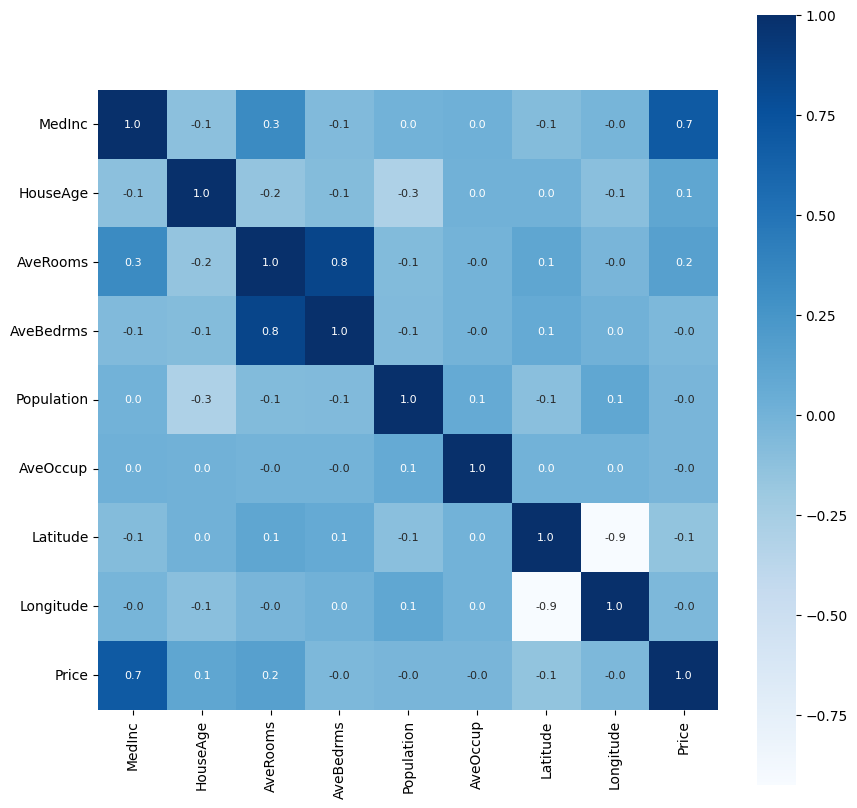

In [12]:
#constructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [13]:
X = df.drop(['Price'],axis=1)
y = df['Price']

Data Standardization

In [14]:
scaler = StandardScaler()

In [16]:
std_data = scaler.fit_transform(X)

In [17]:
X = std_data
y = df['Price']

***Train test split***

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGB Boost Regressor

In [20]:
#Loading the model
model = XGBRegressor()

In [21]:
#Training the model with X_train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [22]:
#Prediction on training data
X_train_pred = model.predict(X_train)
#R squared Error
score_1 = metrics.r2_score(y_train,X_train_pred)
#Mean absolute error
score_2 = metrics.mean_absolute_error(y_train,X_train_pred)

print("R squared Error:",score_1)
print("Mean absolute error:",score_2)

R squared Error: 0.9451221492760822
Mean absolute error: 0.1919170860794262


Visualizing actual price and predicted price

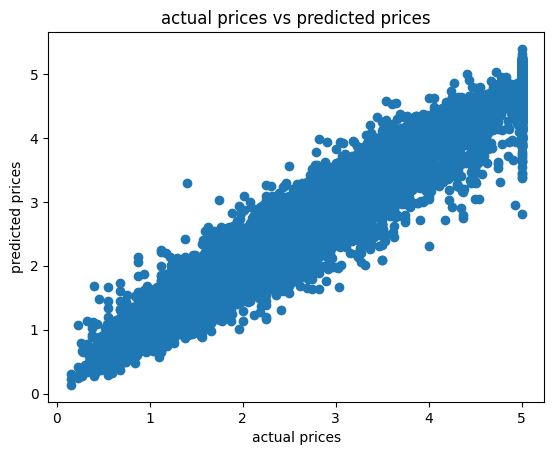

In [23]:
plt.scatter(y_train,X_train_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

In [25]:
#Prediction on tesing data
X_test_pred = model.predict(X_test)
#R squared Error
score_1 = metrics.r2_score(y_test,X_test_pred)
#Mean absolute error
score_2 = metrics.mean_absolute_error(y_test,X_test_pred)

print("R squared Error:",score_1)
print("Mean absolute error:",score_2)

R squared Error: 0.8413137395025392
Mean absolute error: 0.30747387430412365


Making a Predictive System

In [28]:
input_data = (7,52.0,8,2.073059,310,3.547945,44.85,-150.25)
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#Standardize the input data
stand_data = scaler.transform(input_data_reshaped)
prediction = model.predict(stand_data)
print(prediction)


[2.8549721]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
